## Importing Essential Libraries


In [1]:
#import filterwarnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and Reading the dataset


In [3]:
lead = pd.read_csv("Leads.csv")

In [4]:
lead

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [5]:
lead.shape

(9240, 37)

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


## Data Cleaning 

### Handling Null Data

In [8]:
# Finding NULL values in the DF
lead.isnull().sum().sort_values(ascending= False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [9]:
# Columns with NULL Values greater than  3000 (32%)
for col in lead.columns:
    if lead[col].isnull().sum()>=3000:
        print (col,lead[col].isnull().sum())

Tags 3353
Lead Quality 4767
Asymmetrique Activity Index 4218
Asymmetrique Profile Index 4218
Asymmetrique Activity Score 4218
Asymmetrique Profile Score 4218


In [10]:
# Removing Columns with NULL Values greater than  3000 (32%)
for col in lead.columns:
    if lead[col].isnull().sum()>=3000:
        lead.drop(col,1,inplace=True)

In [11]:
# Confirming if the above columns with NULL value greater than 3000 are dropped
lead.isnull().sum().sort_values(ascending= False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [12]:
# Shape of the Dataframe for reference
lead.shape

(9240, 31)

### Analysing the columns that are less significant

In [13]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [15]:
# Removing the columns Prospect ID and Lead Number as they are less significant
lead.drop(["Prospect ID","Lead Number"],1,inplace=True)

In [16]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


Removing other less significant columns like Country and City - as they also have higher NULL values



In [17]:
lead.drop(["Country","City"],1,inplace=True)

In [18]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Select,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,Select,No,No,Modified


In [19]:
#Analysing Categorical Columns
for col in lead.columns:
    print(col)
    print(lead[col].astype('category').value_counts())
    print("\n\n--------------------------------------------------------------------------\n\n")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


--------------------------------------------------------------------------


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64


--------------------------------------------------------------------------


Do Not Email
No     8506
Yes     734
Name: Do No

In [20]:
# List of binary columns with bad variance
Bin_col_bad_var = ["Do Not Call","What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
                  "Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content",
                  "Get updates on DM Content","I agree to pay the amount through cheque"]

In [21]:
len(Bin_col_bad_var)

13

In [22]:
# Dropping less variance columns
lead.drop(Bin_col_bad_var,1, inplace=True)

In [23]:
#Analysing the remaining Categorical Columns
for col in lead.columns:
    print(col)
    print(lead[col].astype('category').value_counts())
    print("\n\n--------------------------------------------------------------------------\n\n")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


--------------------------------------------------------------------------


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64


--------------------------------------------------------------------------


Do Not Email
No     8506
Yes     734
Name: Do No

In [24]:
# Categorical Columns with large number of "Select" value - 
# Which means the user did not select any values in the category.
Col_sel = ["Lead Profile","How did you hear about X Education"]

In [25]:
# Dropping less significant categorical columns where large number of users did not select anything.
lead.drop(Col_sel,1, inplace=True)

In [26]:
lead.shape

(9240, 12)

Now the dataframe consist of 12 columns

In [27]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          7802 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [28]:
# Analysing the remaining columns and handling their NULL values
lead.isnull().sum().sort_values(ascending= False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [29]:
### Changing the column names 
#change nomenclature to snakecase
lead.columns = lead.columns.str.replace(' ', '_').str.lower()

In [30]:
lead.head()

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,specialization,what_is_your_current_occupation,a_free_copy_of_mastering_the_interview,last_notable_activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [31]:
lead.isnull().sum().sort_values(ascending= False)

what_is_your_current_occupation           2690
specialization                            1438
totalvisits                                137
page_views_per_visit                       137
last_activity                              103
lead_source                                 36
lead_origin                                  0
do_not_email                                 0
converted                                    0
total_time_spent_on_website                  0
a_free_copy_of_mastering_the_interview       0
last_notable_activity                        0
dtype: int64

### Handling NULL values in the remaing columns

#### Handling NULLs in what_is_your_current_occupation  

In [32]:
lead['what_is_your_current_occupation'].isna().sum()

2690

In [33]:
lead['what_is_your_current_occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: what_is_your_current_occupation, dtype: int64

In [34]:
#Removing all the Rows with "what_is_your_current_occupation" = NULL
lead = lead[~pd.isna(lead['what_is_your_current_occupation'])]

In [35]:
lead['what_is_your_current_occupation'].isna().sum()

0

#### Handling NULLs in specialization 

In [36]:
lead['specialization'].isna().sum()

18

In [37]:
lead['specialization'].value_counts()

Select                               1929
Finance Management                    762
Marketing Management                  678
Human Resource Management             676
Operations Management                 395
Business Administration               314
Supply Chain Management               278
IT Projects Management                278
Banking, Investment And Insurance     269
Media and Advertising                 162
Travel and Tourism                    150
International Business                138
Healthcare Management                 125
Hospitality Management                 93
E-COMMERCE                             81
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: specialization, dtype: int64

In [38]:
#Removing all the Rows with "specialization" = NULL
lead = lead[~pd.isna(lead['specialization'])]

In [39]:
lead['specialization'].isna().sum()

0

#### Handling NULLs in totalvisits 

In [40]:
lead['totalvisits'].isna().sum()

130

In [41]:
lead['totalvisits'].value_counts()

0.0      1375
2.0      1226
3.0       937
4.0       823
5.0       578
6.0       337
1.0       260
7.0       225
8.0       162
9.0       128
10.0       76
11.0       70
13.0       39
12.0       31
14.0       28
16.0       16
15.0       14
17.0       12
18.0       12
20.0       10
19.0        6
27.0        5
23.0        5
21.0        5
24.0        3
25.0        3
22.0        3
26.0        2
29.0        2
55.0        1
251.0       1
74.0        1
42.0        1
28.0        1
115.0       1
43.0        1
30.0        1
32.0        1
Name: totalvisits, dtype: int64

In [42]:
#Removing all the Rows with "totalvisits" = NULL
lead = lead[~pd.isna(lead['totalvisits'])]

In [43]:
lead['totalvisits'].isna().sum()

0

#### Handling NULLs in lead_source  

In [44]:
lead['lead_source'].isna().sum()

29

In [45]:
lead['lead_source'].value_counts()

Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
WeLearn                 1
Press_Release           1
Pay per Click Ads       1
testone                 1
Name: lead_source, dtype: int64

In [46]:
#Removing all the Rows with "lead_source" = NULL
lead = lead[~pd.isna(lead['lead_source'])]

In [47]:
lead['lead_source'].isna().sum()

0

In [48]:
#After treating all the NULL values -
lead.isnull().sum().sort_values(ascending= False)

lead_origin                               0
lead_source                               0
do_not_email                              0
converted                                 0
totalvisits                               0
total_time_spent_on_website               0
page_views_per_visit                      0
last_activity                             0
specialization                            0
what_is_your_current_occupation           0
a_free_copy_of_mastering_the_interview    0
last_notable_activity                     0
dtype: int64

## Data Preparation

In [49]:
lead.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'converted',
       'totalvisits', 'total_time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'specialization', 'what_is_your_current_occupation',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [50]:
for col in lead.columns:
    print(lead[col].value_counts())
    print("\n\n--------------------------------------------------------------------------\n\n")

Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: lead_origin, dtype: int64


--------------------------------------------------------------------------


Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
WeLearn                 1
Press_Release           1
Pay per Click Ads       1
testone                 1
Name: lead_source, dtype: int64


--------------------------------------------------------------------------


No     5938
Yes     435
Name: do_not_email, dtype: int64


--------------------------------------------------------------------------


0    3308
1    3065
Name: converted, dtype: int64


----------------------------------------------

### Binary categorical columns

In [51]:
bin_col = ["do_not_email","a_free_copy_of_mastering_the_interview"]

In [52]:
def bin_cat(x):
    return x.map({"Yes":1,"No":0})

In [53]:
lead[bin_col] = lead[bin_col].apply(bin_cat)

### One Hot Encoding

In [54]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead_origin                             6373 non-null   object 
 1   lead_source                             6373 non-null   object 
 2   do_not_email                            6373 non-null   int64  
 3   converted                               6373 non-null   int64  
 4   totalvisits                             6373 non-null   float64
 5   total_time_spent_on_website             6373 non-null   int64  
 6   page_views_per_visit                    6373 non-null   float64
 7   last_activity                           6373 non-null   object 
 8   specialization                          6373 non-null   object 
 9   what_is_your_current_occupation         6373 non-null   object 
 10  a_free_copy_of_mastering_the_interview  6373 non-null   int6

In [55]:
for col in lead.columns:
    print(lead[col].value_counts())
    print("\n\n--------------------------------------------------------------------------\n\n")

Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: lead_origin, dtype: int64


--------------------------------------------------------------------------


Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
WeLearn                 1
Press_Release           1
Pay per Click Ads       1
testone                 1
Name: lead_source, dtype: int64


--------------------------------------------------------------------------


0    5938
1     435
Name: do_not_email, dtype: int64


--------------------------------------------------------------------------


0    3308
1    3065
Name: converted, dtype: int64


--------------------------------------------------

In [56]:
# Creating dummy variables for all categorical columns except specialization column 
dum = pd.get_dummies(lead[["lead_origin", "lead_source", "last_activity", 
                        "what_is_your_current_occupation", "last_notable_activity"]],drop_first=True)

# concat dummies with lead dataframe
lead = pd.concat([lead,dum], axis=1)

In [57]:
lead.head()

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,specialization,what_is_your_current_occupation,...,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [58]:
#Creating Dummy variables for Specialization column
dum1 = pd.get_dummies(lead[["specialization"]])

In [59]:
#Dropping Select column
dum1 = dum1.drop(["specialization_Select"],axis=1)

In [60]:
# concat dummies with lead dataframe
lead = pd.concat([lead,dum1], axis=1)

In [61]:
#Dropping the Catecorical column from lead dataframe
lead = lead.drop(["lead_origin", "lead_source", "last_activity", 
                        "what_is_your_current_occupation", "last_notable_activity","specialization"],axis=1)

In [62]:
lead.head()

,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,a_free_copy_of_mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,...,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modeling

In [63]:
# Adding features to X
X =  lead.drop(["converted"],1)

In [64]:
# Adding converted target variable to y
y = lead["converted"]

### Train Test split and Feature Scaling

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Feature Scaling with Min-Max Scaler

In [67]:
lead.head()

,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,a_free_copy_of_mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,...,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
lead.select_dtypes(exclude="uint8")

,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,a_free_copy_of_mastering_the_interview
0,0,0,0.0,0,0.00,0
1,0,0,5.0,674,2.50,0
2,0,1,2.0,1532,2.00,1
3,0,0,1.0,305,1.00,0
4,0,1,2.0,1428,1.00,0
...,...,...,...,...,...,...
9234,0,1,5.0,210,2.50,0
9235,1,1,8.0,1845,2.67,0
9236,0,0,2.0,238,2.00,1
9237,1,0,2.0,199,2.00,1


In [69]:
lead.select_dtypes(exclude="uint8").columns

Index(['do_not_email', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit',
       'a_free_copy_of_mastering_the_interview'],
      dtype='object')

In [70]:
# Getting the list of numerical features from lead
numerical = ['totalvisits','total_time_spent_on_website', 'page_views_per_visit']

In [71]:
from sklearn.preprocessing import MinMaxScaler
#Assigning Scaler
scaler = MinMaxScaler()
# Perform fit and transform on the X_train dataset
X_train[numerical] = scaler.fit_transform(X_train[numerical])

# Perform only transform on the X_test dataset
X_test[numerical] = scaler.transform(X_test[numerical])

In [72]:
# Checking Lead Conversion Rate
conv_rate = (sum(lead["converted"]) / len(lead["converted"].index)) * 100

conv_rate

48.093519535540565

Lead Conversion rate is ~48% 

### Correlation of numerical field

In [73]:
corr1 = lead.corr()

In [74]:
corr1.head()

,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,a_free_copy_of_mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,...,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism
do_not_email,1.000000,-0.148451,0.028900,-0.054778,0.036723,0.052271,0.081123,-0.027360,-0.017655,0.086261,...,0.048816,0.011698,-0.029050,0.011938,-0.012156,0.020802,0.026478,0.042738,-0.005422,0.048711
converted,-0.148451,1.000000,0.005651,0.313338,-0.063362,-0.094833,-0.117563,0.288666,-0.019269,-0.133600,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
totalvisits,0.028900,0.005651,1.000000,0.202551,0.489039,0.186583,0.267954,-0.208375,-0.043000,0.075252,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
total_time_spent_on_website,-0.054778,0.313338,0.202551,1.000000,0.303870,0.154256,0.275606,-0.249493,-0.061429,0.114088,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
page_views_per_visit,0.036723,-0.063362,0.489039,0.303870,1.000000,0.251474,0.458168,-0.340185,-0.065739,0.109785,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284


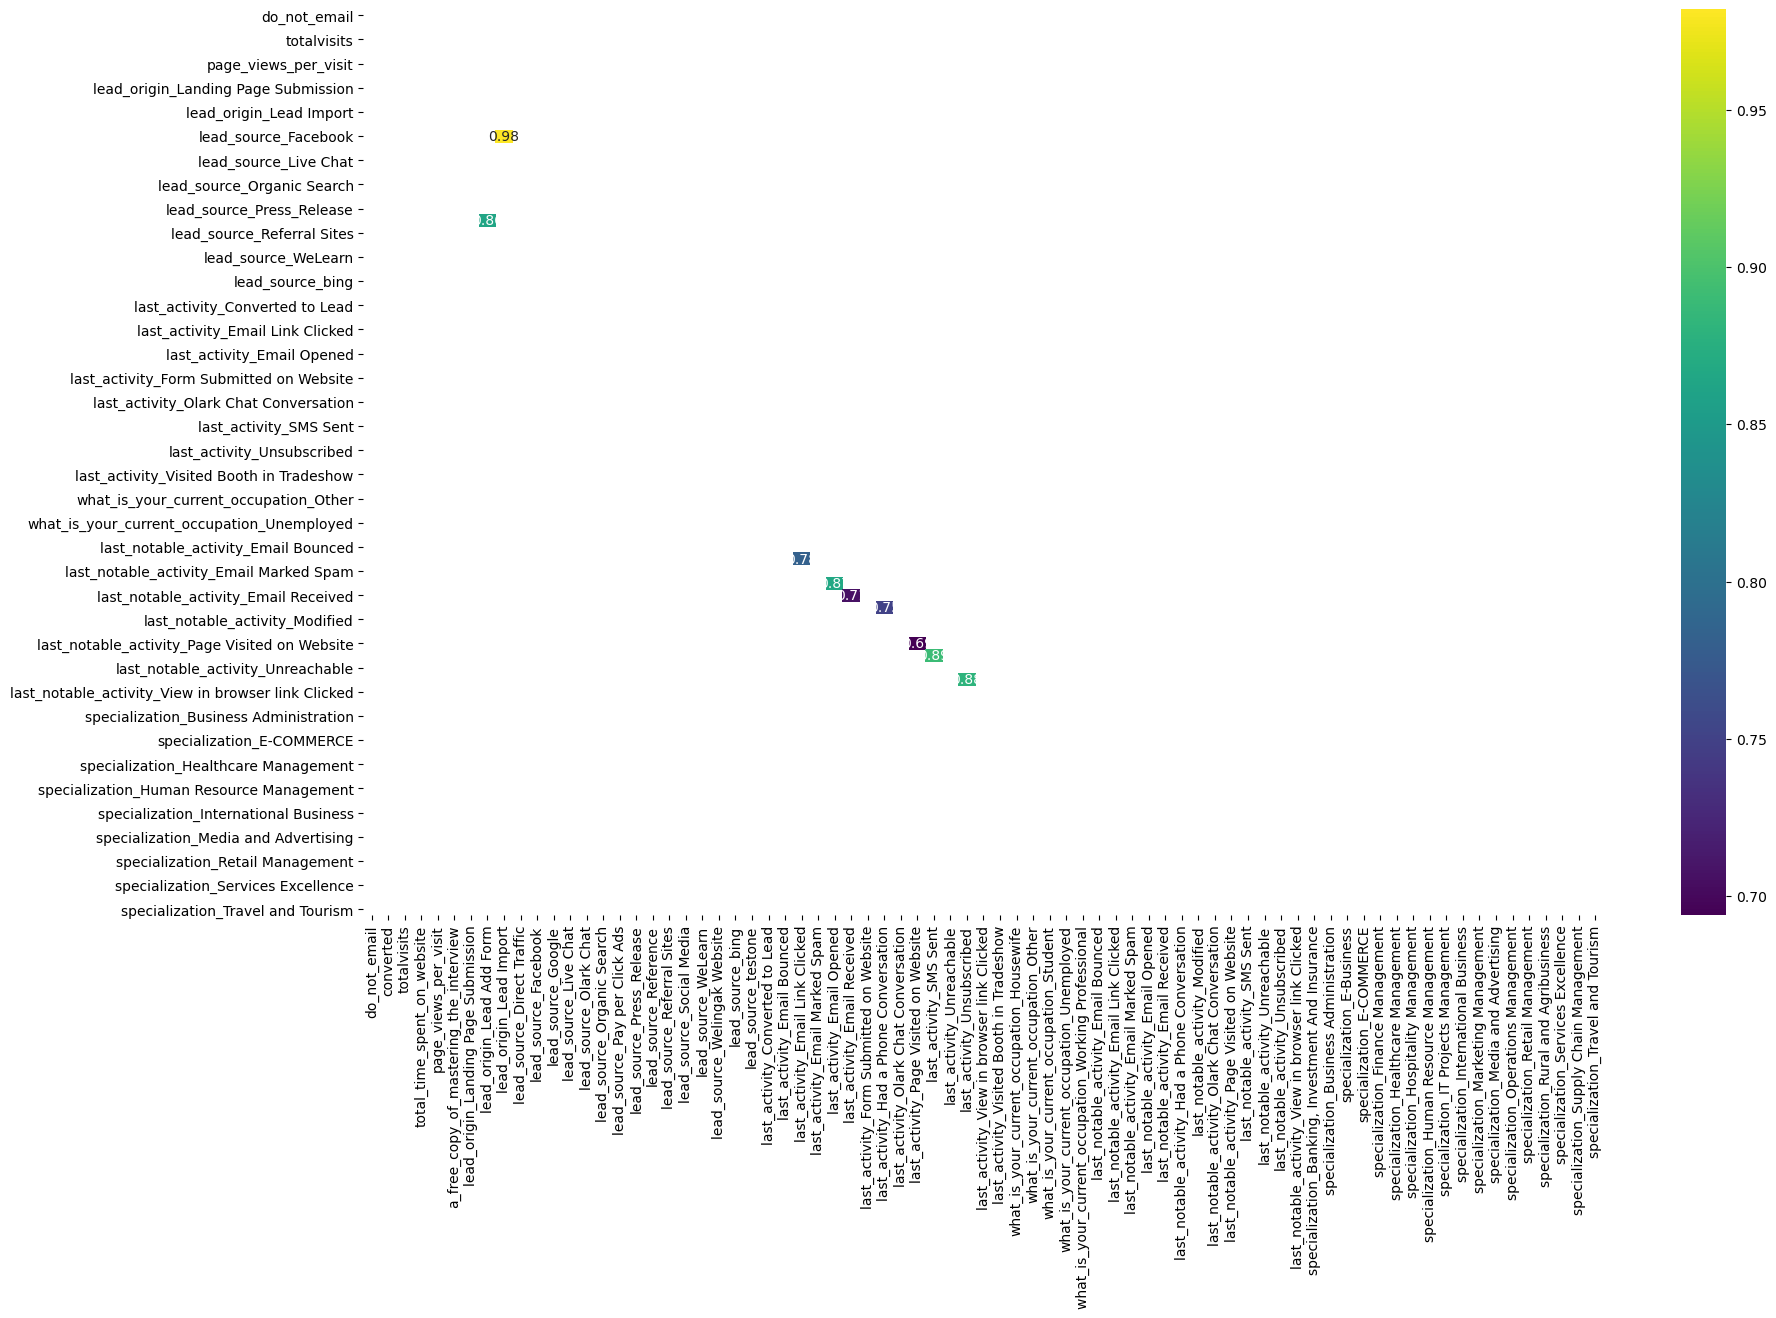

In [75]:
# Heatmap
mask = np.array(corr1)
plt.figure(figsize = (20,12),dpi=100)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(data = corr1[(corr1 >= 0.6) & (corr1 <= 0.9999)], annot = True, 
            cmap = "viridis", cbar = True, fmt='.2f', mask=mask)
plt.show()


List of columns with 60% or above correlations

In [76]:
corr1[(corr1 >= 0.6) & (corr1 <= 0.9999)].unstack().sort_values(ascending = False).head(18)

lead_origin_Lead Import                         lead_source_Facebook                              0.981903
lead_source_Facebook                            lead_origin_Lead Import                           0.981903
last_activity_SMS Sent                          last_notable_activity_SMS Sent                    0.890591
last_notable_activity_SMS Sent                  last_activity_SMS Sent                            0.890591
last_activity_Unsubscribed                      last_notable_activity_Unsubscribed                0.879716
last_notable_activity_Unsubscribed              last_activity_Unsubscribed                        0.879716
last_activity_Email Opened                      last_notable_activity_Email Opened                0.866192
last_notable_activity_Email Opened              last_activity_Email Opened                        0.866192
lead_source_Reference                           lead_origin_Lead Add Form                         0.862980
lead_origin_Lead Add Form            

## Model Building

With RFE we can refine the 74 feature variables to 15 features

### Model 1

In [77]:
# Import library from statsmodels
import statsmodels.api as sm

In [78]:
logitm1 = sm.GLM(y_train, (sm.add_constant(X_train)),  family=sm.families.Binomial())

In [79]:
logitm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4392
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 08 Dec 2021   Deviance:                   1.0887e+05
Time:                        01:46:18   Pearson chi2:                 5.32e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -3.501e+15   8.84e+07  -3.96e+07      0.000    -3.5e+15    -3.5e+15
do_not_email                                          2.442e+13   5.42e+06    4.5e+06      0.000    2.44e+13    2.44e+13
totalvisits                                           5.093e+15    5.4e+07   9.44e+07      0.000    5.09e+15    5.09e+15
total_time_spent_on_website                           3.233e+15   4.67e+06   6.93e+08      0.000    3.23e+15    3.23e+15
page_views_per_visit                                 -8.965e+14   1.16e+07  -7.76e+07      0.000   -8.96e+14   -8.96e+14
a_free_copy_of_mastering_the_interview               -1.342e+14   3.09e+06  -4.34e+07      0.000   -1.34e+14   -1.34e+14
lead_origin_Landing Page Submission                   2.843e+14   3.81e+06   7.46e+07      0.000    2.84e+14    2.84e+14
lead_origin_Lead Add Form                             4.587e+15   4.77e+07   9.63e+07      0.000    4.59e+15    4.59e+15
lead_origin_Lead Import                               3.398e+15   4.21e+07   8.07e+07      0.000     3.4e+15     3.4e+15
lead_source_Direct Traffic                            7.423e+15   8.26e+07   8.99e+07      0.000    7.42e+15    7.42e+15
lead_source_Facebook                                  3.398e+15   4.21e+07   8.07e+07      0.000     3.4e+15     3.4e+15
lead_source_Google                                    7.636e+15   8.25e+07   9.25e+07      0.000    7.64e+15    7.64e+15
lead_source_Live Chat                                 1.063e+16   8.24e+07   1.29e+08      0.000    1.06e+16    1.06e+16
lead_source_Olark Chat                                7.311e+15   8.25e+07   8.86e+07      0.000    7.31e+15    7.31e+15
lead_source_Organic Search                             7.66e+15   8.26e+07   9.28e+07      0.000    7.66e+15    7.66e+15
lead_source_Pay per Click Ads                         3.774e+15   1.06e+08   3.54e+07      0.000    3.77e+15    3.77e+15
lead_source_Press_Release                             4.219e+15   1.07e+08   3.94e+07      0.000    4.22e+15    4.22e+15
lead_source_Reference                                 4.875e+15   6.74e+07   7.23e+07      0.000    4.88e+15    4.88e+15
lead_source_Referral Sites                            7.911e+15   8.31e+07   9.52e+07      0.000    7.91e+15    7.91e+15
lead_source_Social Media                              -140.7949   2.06e-06  -6.84e+07      0.000    -140.795    -140.795
lead_source_WeLearn                                   1.119e+16   1.06e+08   1.05e+08      0.000    1.12e+16    1.12e+16
lead_source_Welingak Website                          4.779e+15   6.77e+07   7.06e+07      0.000    4.78e+15    4.78e+15
lead_source_bing                                       4.4

### Feature Selection using RFE

In [80]:
#Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [81]:
logitreg = LogisticRegression()

In [82]:
#Importing RFE from sklearn
from sklearn.feature_selection import RFE

In [83]:
# Selection of 15 features by RFE
rfe = RFE(logitreg, 15)
rfe = rfe.fit(X_train, y_train)

In [84]:
#List of features 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('totalvisits', True, 1),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 23),
 ('a_free_copy_of_mastering_the_interview', False, 50),
 ('lead_origin_Landing Page Submission', False, 8),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', False, 51),
 ('lead_source_Direct Traffic', False, 24),
 ('lead_source_Facebook', False, 52),
 ('lead_source_Google', False, 36),
 ('lead_source_Live Chat', False, 44),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 35),
 ('lead_source_Pay per Click Ads', False, 43),
 ('lead_source_Press_Release', False, 53),
 ('lead_source_Reference', True, 1),
 ('lead_source_Referral Sites', False, 37),
 ('lead_source_Social Media', False, 58),
 ('lead_source_WeLearn', False, 42),
 ('lead_source_Welingak Website', True, 1),
 ('lead_source_bing', False, 33),
 ('lead_source_testone', False, 38),
 ('last_activity_Converted to Lead', False, 25),
 ('last_activity_Emai

In [85]:
# list columns selected by RFE
col = X_train.columns[rfe.support_]

In [86]:
col

Index(['do_not_email', 'totalvisits', 'total_time_spent_on_website',
       'lead_origin_Lead Add Form', 'lead_source_Olark Chat',
       'lead_source_Reference', 'lead_source_Welingak Website',
       'last_activity_Had a Phone Conversation', 'last_activity_SMS Sent',
       'what_is_your_current_occupation_Housewife',
       'what_is_your_current_occupation_Student',
       'what_is_your_current_occupation_Unemployed',
       'what_is_your_current_occupation_Working Professional',
       'last_notable_activity_Had a Phone Conversation',
       'last_notable_activity_Unreachable'],
      dtype='object')

### Model 2

In [87]:
#Model 2
logitm2= sm.GLM(y_train, (sm.add_constant(X_train[col])),  family=sm.families.Binomial())

In [88]:
# Fitting the model
res = logitm2.fit()

In [89]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Wed, 08 Dec 2021   Deviance:                       4145.5
Time:                        01:46:20   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
do_not_email                                            -1.5053      0.193     -7.781      0.000      -1.884      -1.126
totalvisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
total_time_spent_on_website                              4.4312      0.185     23.924      0.000       4.068       4.794
lead_origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
lead_source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
lead_source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
lead_source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
last_activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
last_activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
what_is_your_current_occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
what_is_your_current_occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
what_is_your_current_occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
what_is_your_current_occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
last_notable_activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
last_notable_activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

####  Finding VIFs

In [90]:
#importing variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# Creating a dataframe that contains the names of all the feature variables and their corresponding VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending=False)
VIF

,Features,VIF
3,lead_origin_Lead Add Form,84.19
5,lead_source_Reference,65.18
6,lead_source_Welingak Website,20.03
11,what_is_your_current_occupation_Unemployed,3.65
7,last_activity_Had a Phone Conversation,2.44
13,last_notable_activity_Had a Phone Conversation,2.43
2,total_time_spent_on_website,2.38
1,totalvisits,1.62
8,last_activity_SMS Sent,1.59
12,what_is_your_current_occupation_Working Profes...,1.56


lead_origin_Lead Add Form,lead_source_Reference and lead_source_Welingak Website -- have high VIF and does not seem to contribute much and makes the medel complex. First let us start by dropipng "lead_source_Reference"

In [92]:
col = col.drop("lead_source_Reference",1)


### Model 3

In [93]:
#Model 3
logitm3= sm.GLM(y_train, (sm.add_constant(X_train[col])),  family=sm.families.Binomial())

In [94]:
#Fitting and summary
res = logitm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Wed, 08 Dec 2021   Deviance:                       4146.5
Time:                        01:46:20   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
do_not_email                                            -1.5036      0.193     -7.779      0.000      -1.882      -1.125
totalvisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
total_time_spent_on_website                              4.4312      0.185     23.924      0.000       4.068       4.794
lead_origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
lead_source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
lead_source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
last_activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
last_activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
what_is_your_current_occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
what_is_your_current_occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
what_is_your_current_occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
what_is_your_current_occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
last_notable_activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
last_notable_activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

#### Finding VIFs for Model 3

In [95]:
# Creating a dataframe that contains the names of all the feature variables and their corresponding VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending=False)
VIF

,Features,VIF
10,what_is_your_current_occupation_Unemployed,3.65
6,last_activity_Had a Phone Conversation,2.44
12,last_notable_activity_Had a Phone Conversation,2.43
2,total_time_spent_on_website,2.38
3,lead_origin_Lead Add Form,1.71
1,totalvisits,1.62
7,last_activity_SMS Sent,1.59
11,what_is_your_current_occupation_Working Profes...,1.56
4,lead_source_Olark Chat,1.44
5,lead_source_Welingak Website,1.33


All the VIFs are below 5 in the above dataframe. 
Dropping one of the feature with higher VIFs 

In [96]:
col = col.drop('last_notable_activity_Had a Phone Conversation', 1)

### Model 4

In [97]:
#Model 4
logitm4= sm.GLM(y_train, (sm.add_constant(X_train[col])),  family=sm.families.Binomial())
#Fitting and summary
res = logitm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Wed, 08 Dec 2021   Deviance:                       4152.2
Time:                        01:46:20   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
do_not_email                                            -1.5037      0.193     -7.780      0.000      -1.882      -1.125
totalvisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
total_time_spent_on_website                              4.4237      0.185     23.900      0.000       4.061       4.787
lead_origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
lead_source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
lead_source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
last_activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
last_activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
what_is_your_current_occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
what_is_your_current_occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
what_is_your_current_occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
what_is_your_current_occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
last_notable_activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

Dropping  "what_is_your_current_occupation_Housewife" with high P-value

In [98]:
col = col.drop('what_is_your_current_occupation_Housewife', 1)
len(col)

12

### Model 5


In [99]:
#Model 5
logitm5= sm.GLM(y_train, (sm.add_constant(X_train[col])),  family=sm.families.Binomial())
#Fitting and summary
res = logitm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Wed, 08 Dec 2021   Deviance:                       4156.7
Time:                        01:46:20   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
do_not_email                                            -1.5063      0.193     -7.785      0.000      -1.886      -1.127
totalvisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
total_time_spent_on_website                              4.4217      0.185     23.898      0.000       4.059       4.784
lead_origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
lead_source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
lead_source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
last_activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
last_activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
what_is_your_current_occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
what_is_your_current_occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
what_is_your_current_occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
last_notable_activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

Dropping "what_is_your_current_occupation_Working Professional" with high P-value

In [100]:
col = col.drop('what_is_your_current_occupation_Working Professional', 1)
len(col)

11

### Model 6

In [101]:
#Model 6
logitm6= sm.GLM(y_train, (sm.add_constant(X_train[col])),  family=sm.families.Binomial())
#Fitting and summary
res = logitm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Wed, 08 Dec 2021   Deviance:                       4158.1
Time:                        01:46:20   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
do_not_email                                  -1.5037      0.193     -7.774      0.000      -1.883      -1.125
totalvisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
total_time_spent_on_website                    4.4223      0.185     23.899      0.000       4.060       4.785
lead_origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
lead_source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
lead_source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
last_activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
last_activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
what_is_your_current_occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
what_is_your_current_occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
last_notable_activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

#### Finding VIFs

In [102]:
# Creating a dataframe that contains the names of all the feature variables and their corresponding VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending=False)
VIF

,Features,VIF
9,what_is_your_current_occupation_Unemployed,2.82
2,total_time_spent_on_website,2.00
1,totalvisits,1.54
7,last_activity_SMS Sent,1.51
3,lead_origin_Lead Add Form,1.45
4,lead_source_Olark Chat,1.33
5,lead_source_Welingak Website,1.30
0,do_not_email,1.08
8,what_is_your_current_occupation_Student,1.06
6,last_activity_Had a Phone Conversation,1.01


### Model Evaluation

In [103]:
X_train_sm = sm.add_constant(X_train[col])
X_train_sm.shape

(4461, 12)

In [104]:
# Predicting probabilities on the Train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [105]:
# y_train (target value) and y_train_pred (predicted probability)
y_train_pred_final = pd.DataFrame({"Converted": y_train.values, "Conversion_Prob": y_train_pred})
y_train_pred_final.head(10)

,Converted,Conversion_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795
5,0,0.194426
6,0,0.178073
7,1,0.949460
8,0,0.075995
9,1,0.982316


In [106]:
# creating a column of predicted Converted
#if 'Conversion_Prob' > 0.5 - Predicted Converted is 1 else 0
y_train_pred_final['Predicted_converted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted_converted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1
5,0,0.194426,0
6,0,0.178073,0
7,1,0.949460,1
8,0,0.075995,0
9,1,0.982316,1


#### Evaluation

In [107]:
# import metrics from sklearn
from sklearn import metrics

In [108]:
# Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_converted))

0.7886124187401928


In [109]:
# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_converted)
print(conf_mat)

[[1929  383]
 [ 560 1589]]


| Actual/Predicted | Not Converted | Converted |
| --- | --- | --- |
| Not Converted | 1929   | 383 |
| Converted | 560     | 1589 |

In [110]:
TP = conf_mat[1,1] #True Positive
TN = conf_mat[0,0] #True Negative
FP = conf_mat[0,1] #False Positive
FN = conf_mat[1,0] #False Negative

In [111]:
#Sensitivity of the model
TP / (TP + FN)

0.739413680781759

In [112]:
#Specificity of the model
TN / float(TN + FP)

0.8343425605536332

In [113]:
#False Positive rate (i.e. Predicting conversion when the Customer has not converted)
FP / float(TN + FP)

0.1656574394463668

In [114]:
#Positive Predictive rate
TP / float(TP + FP)

0.8057809330628803

In [115]:
# Negative Predictive rate
TN / float(TN + FN)

0.7750100441944556

## Plotting ROC curve

In [116]:
def roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                                         y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

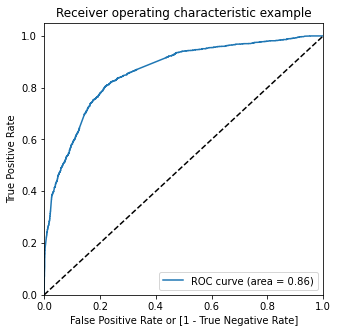

In [118]:
roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

We have a good model with Area Under the Curve as 0.86.
Next we will find Optimal Cut-off Point based on Sensivitivity V/S Specificity trade-off

### Optimal cut-off point

In [119]:
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted_converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1
5,0,0.194426,0,1,1,0,0,0,0,0,0,0,0
6,0,0.178073,0,1,1,0,0,0,0,0,0,0,0
7,1,0.949460,1,1,1,1,1,1,1,1,1,1,1
8,0,0.075995,0,1,0,0,0,0,0,0,0,0,0
9,1,0.982316,1,1,1,1,1,1,1,1,1,1,1


In [120]:
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.481731     1.000000     0.000000
0.1   0.1  0.527012     0.994416     0.092561
0.2   0.2  0.698274     0.944160     0.469723
0.3   0.3  0.767541     0.865984     0.676038
0.4   0.4  0.791975     0.810610     0.774654
0.5   0.5  0.788612     0.739414     0.834343
0.6   0.6  0.757229     0.624011     0.881055
0.7   0.7  0.735037     0.543509     0.913062
0.8   0.8  0.711500     0.453234     0.951557
0.9   0.9  0.644026     0.279665     0.982699


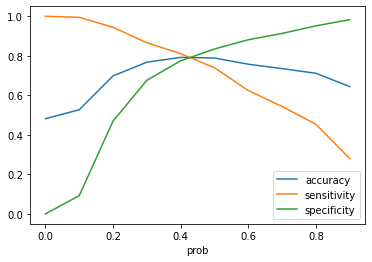

In [121]:
# Plt the accuracy sensitivity and specificity for various probabilities
cutoff.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

The optimal cut-off point is 0.43 based on the curves intersection.

In [122]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted_converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0.194426,0,1,1,0,0,0,0,0,0,0,0,0
6,0,0.178073,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.949460,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0.075995,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.982316,1,1,1,1,1,1,1,1,1,1,1,1


In [123]:
#Accuracy 
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7895090786819099

In [124]:
conf_mat1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
conf_mat1

array([[1834,  478],
       [ 461, 1688]])

In [125]:
TP = conf_mat1[1,1] #True Positive
TN = conf_mat1[0,0] #True Negative
FP = conf_mat1[0,1] #False Positive
FN = conf_mat1[1,0] #False Negative

In [126]:
#Sensitivity of the model
TP / (TP + FN)

0.7854816193578409

In [127]:
#Specificity of the model
TN / float(TN + FP)

0.7932525951557093

In [128]:
#False Positive rate (i.e. Predicting conversion when the Customer has not converted)
FP / float(TN + FP)

0.20674740484429066

In [129]:
#Positive Predictive rate
TP / float(TP + FP)

0.7793167128347184

In [130]:
# Negative Predictive rate
TN / float(TN + FN)

0.7991285403050109

## Precision and Recall

In [131]:
conf_mat3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_converted )
conf_mat3

array([[1929,  383],
       [ 560, 1589]])

In [132]:
# Precision
conf_mat3[1,1]/(conf_mat3[0,1]+conf_mat3[1,1])

0.8057809330628803

In [133]:
# Recall
conf_mat3[1,1]/(conf_mat3[1,0]+conf_mat3[1,1])

0.739413680781759

### Precision and Recall trade-off

In [134]:
# Import precision_recall_curve from sklearn
from sklearn.metrics import precision_recall_curve

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

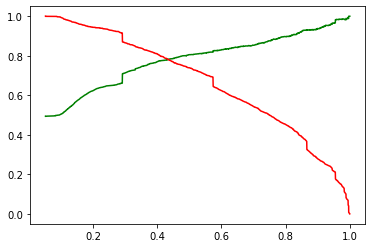

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Optimal Cut-off is 0.43 - for htis precision and recall

##  Predictions on the test set

In [137]:
X_test = X_test[col]
X_test.head()

,do_not_email,totalvisits,total_time_spent_on_website,lead_origin_Lead Add Form,lead_source_Olark Chat,lead_source_Welingak Website,last_activity_Had a Phone Conversation,last_activity_SMS Sent,what_is_your_current_occupation_Student,what_is_your_current_occupation_Unemployed,last_notable_activity_Unreachable
4771,0,0.000000,0.000000,1,0,0,0,1,0,0,0
6122,0,0.027888,0.029049,0,0,0,0,0,0,1,0
9202,0,0.015936,0.416813,0,0,0,0,1,0,1,0
6570,1,0.011952,0.378961,0,0,0,0,1,0,1,0
2668,0,0.031873,0.395246,0,0,0,0,1,0,1,0


In [138]:
X_test_sm = sm.add_constant(X_test)

In [139]:
y_test_pred = res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array
y_predf = pd.DataFrame(y_test_pred)

In [142]:
y_predf.head(10)

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796
4233,0.792250
3368,0.704038
9091,0.464521
5972,0.282978
3631,0.786460


In [143]:
#y_test to a DF
y_test_df = pd.DataFrame(y_test)

In [144]:
#Dropping the index
y_predf.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# concat y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_predf],axis=1)

In [146]:
y_pred_final.head(10)

,converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796
5,1,0.792250
6,0,0.704038
7,1,0.464521
8,0,0.282978
9,1,0.786460


In [147]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

y_pred_final.head(10)

,converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796
5,1,0.792250
6,0,0.704038
7,1,0.464521
8,0,0.282978
9,1,0.786460


In [148]:
#since the optimal cut off was found as 0.43
y_pred_final['Final_Predicted_Conv'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [149]:
#Accuracy 
metrics.accuracy_score(y_pred_final.converted, y_pred_final.Final_Predicted_Conv)

0.7850418410041841

In [150]:
conf_mat_test = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.Final_Predicted_Conv)
conf_mat_test

array([[791, 205],
       [206, 710]])

In [151]:
TP = conf_mat_test[1,1] # true positive 
TN = conf_mat_test[0,0] # true negatives
FP = conf_mat_test[0,1] # false positives
FN = conf_mat_test[1,0] # false negatives

In [152]:
#sensitivity
TP / float(TP+FN)

0.7751091703056768

In [153]:
#specificity
TN / float(TN+FP)

0.7941767068273092

### Model Performance

| Train/Test | Accuracy | Sensitivity | Specificity |
| --- | --- | --- | --- |
| Train | 0.7895  | 0.7854 | 0.7932 | 
| Test  | 0.7850  | 0.7751 | 0.7941 |

### Lead Score Calculation 

In [154]:
y_pred_final['Lead Score'] = y_pred_final['Conversion_Prob'].apply(lambda x: round(x*100, 1))

In [159]:
y_pred_final.head(15)

,converted,Conversion_Prob,Final_Predicted_Conv,Lead Score
0,1,0.996296,1,99.6
1,0,0.129992,0,13.0
2,0,0.703937,1,70.4
3,1,0.299564,0,30.0
4,1,0.720796,1,72.1
5,1,0.792250,1,79.2
6,0,0.704038,1,70.4
7,1,0.464521,1,46.5
8,0,0.282978,0,28.3
9,1,0.786460,1,78.6


The above table can help the X Education to find the potential target leads. Hot leads are the ones with higher Lead Score who can be focused more on communicating with the potential leads.